# Introduction:
This project is completely personal work and you're welcome to use it.
This is a simple data analysis of the top 250 movies according to IMDb, you can view the page here 'https://www.imdb.com/chart/top/'. This will include scraping the page provided using python and the analysis will be done using standard python libraries (pandas,matplotlib).

In [1]:
#enabling https
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
#importing libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#getting the page for the top 250 imdb movies
html = urlopen('https://www.imdb.com/chart/top/')
bs = BeautifulSoup(html,'html.parser')

In [4]:
#empty list to store the collected data
data = []
#a loop to find all movies(according to the html formatting of the page)
for movie in bs.find_all('td',{'class':'titleColumn'}):
    row = {'title':movie.find('a').text,
           'year':movie.find('span').text[1:-1],
           'rating':movie.next_sibling.next_sibling.find('strong').text}
    data.append(row)

In [5]:
df = pd.DataFrame(data);
df.to_csv(index=False);

In [6]:
df.head()

,title,year,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather: Part II,1974,9.0
4,12 Angry Men,1957,9.0


In [7]:
#first let's take a look at the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   250 non-null    object
 1   year    250 non-null    object
 2   rating  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [8]:
df.describe()

,title,year,rating
count,250,250,250
unique,250,85,12
top,Paths of Glory,1995,8.1
freq,1,8,67


In [16]:
#converting columns to appropriate data types
df[['year','rating']] = df[['year','rating']].astype(float);
df.dtypes

title      object
year      float64
rating    float64
dtype: object

Let's see how top movies are spread in different decades

In [25]:
df.describe()

,year,rating
count,250.000000,250.000000
mean,1986.368000,8.260400
std,25.124761,0.236762
min,1921.000000,8.000000
25%,1966.250000,8.100000
50%,1994.000000,8.200000
75%,2006.000000,8.400000
max,2021.000000,9.200000


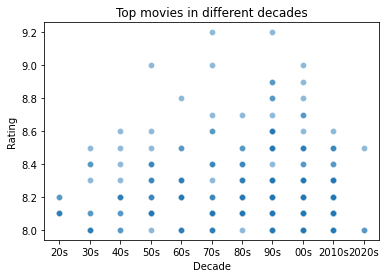

In [23]:
import numpy as np
labels = ['20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s','2020s']
bins = np.arange(start=1920,stop=2031,step=10)
sb.scatterplot(data=df,x=pd.cut(df.year,bins=bins,labels=labels),y=df.rating,alpha=.5);
plt.title('Top movies in different decades');
plt.xlabel('Decade');
plt.ylabel('Rating');

In [26]:
labels = ['20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s','2020s']
df['decade'] = pd.cut(df.year,bins=np.arange(start=1920,stop=2031,step=10),labels=labels);
df.head()

,title,year,rating,decade
0,The Shawshank Redemption,1994.0,9.2,90s
1,The Godfather,1972.0,9.2,70s
2,The Dark Knight,2008.0,9.0,00s
3,The Godfather: Part II,1974.0,9.0,70s
4,12 Angry Men,1957.0,9.0,50s


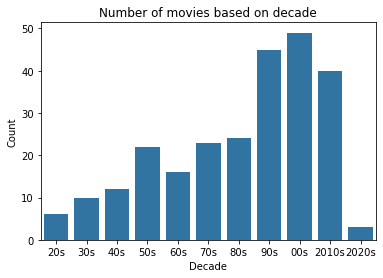

In [30]:
sb.countplot(data=df,x=df.decade,color=sb.color_palette()[0]);
plt.title('Number of movies based on decade');
plt.xlabel('Decade');
plt.ylabel('Count');

From the two plots, we can see that the cinematic industry peaked from 1990 to 2019 with over 30 movies from each decade present on the list.

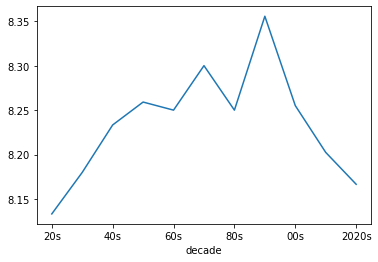

In [37]:
df.groupby('decade')['rating'].mean().plot();

# Conclusion:
We can see that from 1990 to 2019 we had the most movies on the top 250 movies, but that's ignoring the total number of movies released in each decade and the proportion of movies in each decade that made it to the top 250 movies, also these are the top 250 movies according to IMDB and when it comes to movies there are no ground rules and everyone is entitled to their opinions.